In [1]:
#Importamos Librerias Necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.manifold import TSNE
from math import sqrt
from scipy.stats import probplot
from sklearn.manifold import TSNE 
from pyod.models.mad import MAD
from scipy.stats.mstats import winsorize
from scipy.stats import gaussian_kde

In [3]:
#Cargamos el conjunto de datos
df = pd.read_csv('BBDD_Insurance.csv',sep=';',decimal=',')

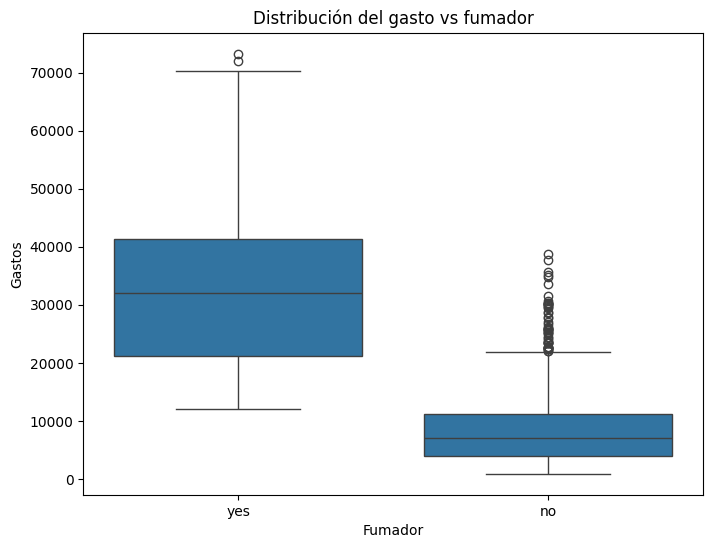

In [7]:
#Grafico de caja para cargos segun persona fumadora o no

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Fumador',y='Gastos')
plt.xlabel('Fumador')
plt.ylabel('Gastos')
plt.title('Distribución del gasto vs fumador')
plt.show()

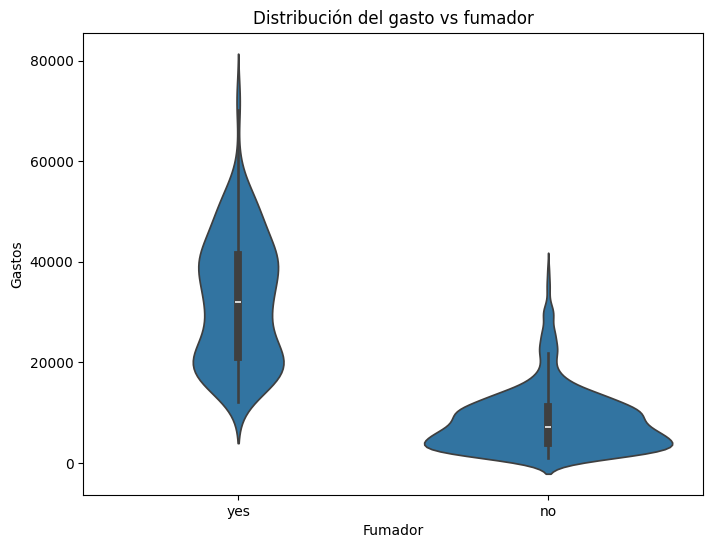

In [11]:
#Grafico de caja para cargos segun persona fumadora o no

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Fumador',y='Gastos')
plt.xlabel('Fumador')
plt.ylabel('Gastos')
plt.title('Distribución del gasto vs fumador')
plt.show()

In [3]:
#Análisis Exploratorio de Datos
#Calidad de los datos
#Manejo de los Datos Duplicados
duplicated_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicated_rows.shape)

#Eliminamos los duplicados
df = df.drop_duplicates()

#Manejo de los datos unicos
#Se hace un bucle para recorrer cada columna para contar los valores distintos de cada una
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

#Verificamos los valores faltantes
print(df.isnull().sum())
#Información Estadistica del conjunto de datos
df.describe()

number of duplicate rows:  (0, 7)
Edad: 47 distinct values
Sexo: 2 distinct values
IMC: 1025 distinct values
Hijos: 6 distinct values
Fumador: 2 distinct values
Region EEUU: 4 distinct values
Gastos: 1337 distinct values
Edad           0
Sexo           0
IMC            0
Hijos          0
Fumador        0
Region EEUU    0
Gastos         0
dtype: int64


,Edad,IMC,Hijos,Gastos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.752451,1.094918,13362.998027
std,14.049960,7.170951,1.205493,12471.191679
min,18.000000,13.090000,0.000000,919.520000
25%,27.000000,25.520000,0.000000,4677.552500
50%,39.000000,30.260000,1.000000,9379.085000
75%,51.000000,35.430000,2.000000,16583.880000
max,64.000000,58.970000,5.000000,73233.660000


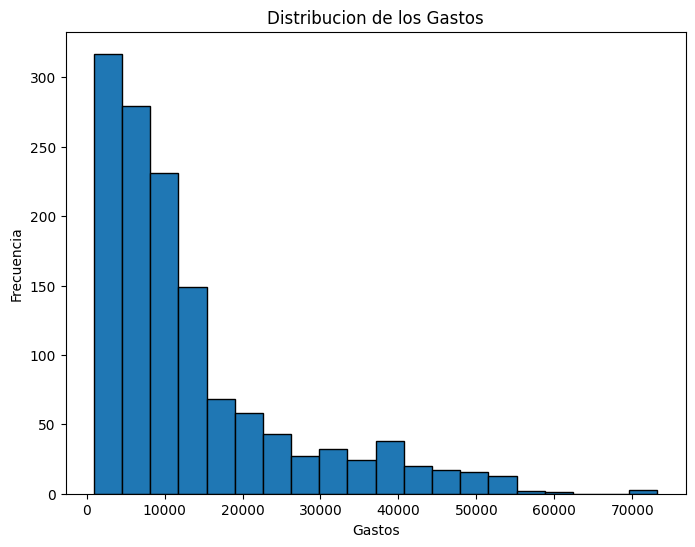

In [4]:
#Análisis Univariado
#Histograma para la distribucion de Gastos

plt.figure(figsize=(8,6))
plt.hist(df['Gastos'], bins=20, edgecolor='black')
plt.xlabel('Gastos')
plt.ylabel('Frecuencia')
plt.title('Distribucion de los Gastos')
plt.show()

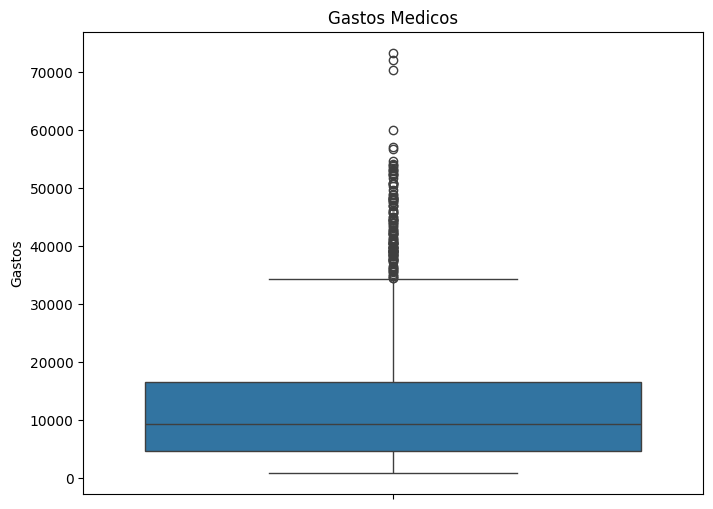

In [9]:
#Grafico de caja para los gastos medicos

plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='Gastos')
plt.ylabel('Gastos')
plt.title('Gastos Medicos')
plt.show()

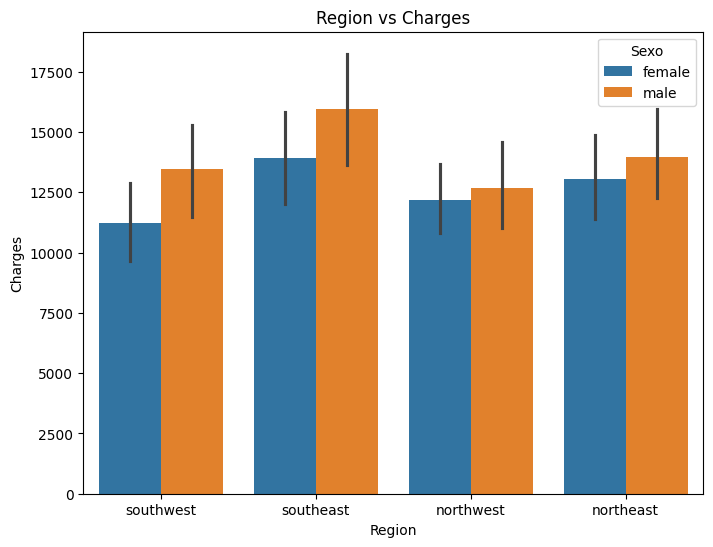

In [5]:
#Gráfico de barras apiladas para Region vs Charges

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Region EEUU', y='Gastos', hue='Sexo')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs Charges')
plt.show()

In [21]:

# Establecer el rango en3.5
mad = MAD(threshold = 3.5)

# Convertir la columna de totales en una matriz 2D de numpy
total_reshaped = df['Gastos'].values.reshape(-1, 1)

# Generar etiquetas para identificar outliers
labels = mad.fit(total_reshaped).labels_
labels

# Numero de outliers
print(f'Number of outliers: {labels.sum()}')

outliers = df[labels == 1]
outliers.head()

Number of outliers: 110


,Edad,Sexo,IMC,Hijos,Fumador,Region EEUU,Gastos
30,22,male,32.40,0,yes,southwest,39855.85
34,28,male,32.40,1,yes,southwest,45051.21
38,35,male,38.87,1,yes,northeast,44149.45
39,60,male,32.72,0,yes,southwest,42392.56
53,36,male,33.05,0,yes,southeast,37365.15


In [25]:
# Calculate the percentiles
seventy_fifth = df['Gastos'].quantile(0.75)
twenty_fifth = df['Gastos'].quantile(0.25)

# Obtain IQR
iqr = seventy_fifth - twenty_fifth

# Upper and lower thresholds
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subset the dataset
outliers = df[(df['Gastos'] < lower) | (df['Gastos'] > upper)]
outliers.head()

,Edad,Sexo,IMC,Hijos,Fumador,Region EEUU,Gastos
14,27,male,36.23,0,yes,southeast,34462.23
29,31,male,37.03,2,yes,southwest,36388.34
30,22,male,32.40,0,yes,southwest,39855.85
34,28,male,32.40,1,yes,southwest,45051.21
38,35,male,38.87,1,yes,northeast,44149.45


In [26]:
# Obtain number of outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 123


In [29]:
#Importa el paquete y las librerias necesarias
from scipy.stats.mstats import winsorize

#Se sustituye el dataframe original por el winsorizado
df_winsorized = df.copy()
df_winsorized['Gastos'] = winsorize(df_winsorized['Gastos'],\
  limits = [0.05, 0.05], inplace = True)

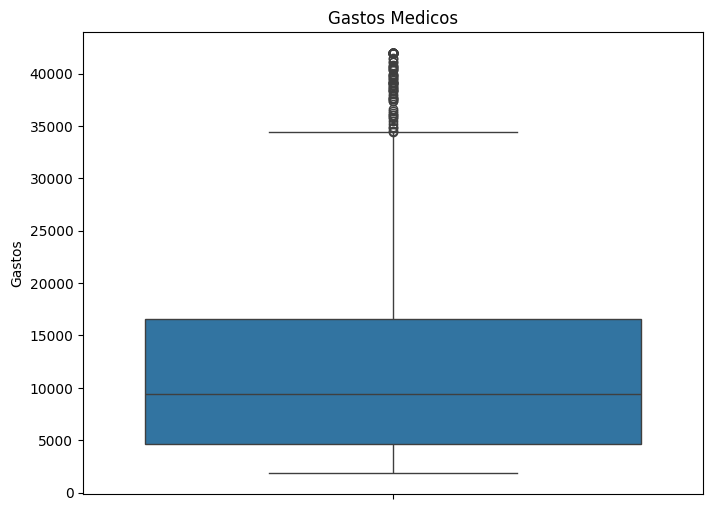

In [30]:
#Grafico de caja para los gastos medicos windorized

plt.figure(figsize=(8,6))
sns.boxplot(data=df_winsorized, y='Gastos')
plt.ylabel('Gastos')
plt.title('Gastos Medicos')
plt.show()

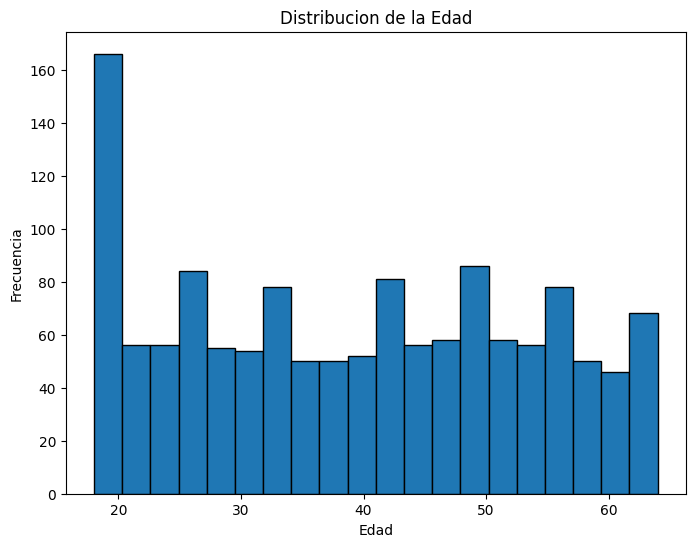

In [33]:
#Análisis Univariado
#Histograma para la distribucion de edad

plt.figure(figsize=(8,6))
plt.hist(df['Edad'], bins=20, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la Edad')
plt.show()

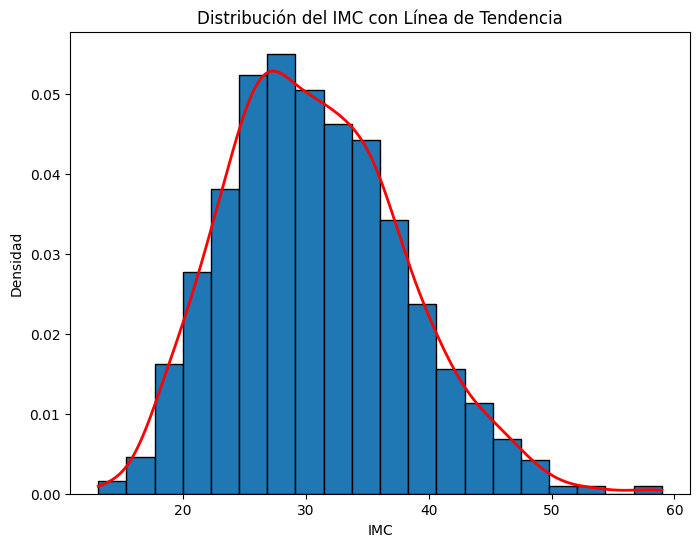

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Datos de ejemplo (asegúrate de tener tu DataFrame df con la columna 'IMC')
# df = pd.DataFrame({'IMC': [...]})  # Tus datos de IMC aquí

# Crear el histograma
plt.figure(figsize=(8,6))
plt.hist(df['IMC'], bins=20, edgecolor='black', density=True)  # Usar density=True para normalizar

# Calcular la densidad del kernel
kde = gaussian_kde(df['IMC'])
x_range = np.linspace(df['IMC'].min(), df['IMC'].max(), 1000)
kde_values = kde(x_range)

# Graficar la línea de tendencia
plt.plot(x_range, kde_values, color='red', linewidth=2)

# Etiquetas y título
plt.xlabel('IMC')
plt.ylabel('Densidad')
plt.title('Distribución del IMC con Línea de Tendencia')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_18232\2066237133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hijos', palette=colors, width=0.6)  # Ajustar el ancho de las barras


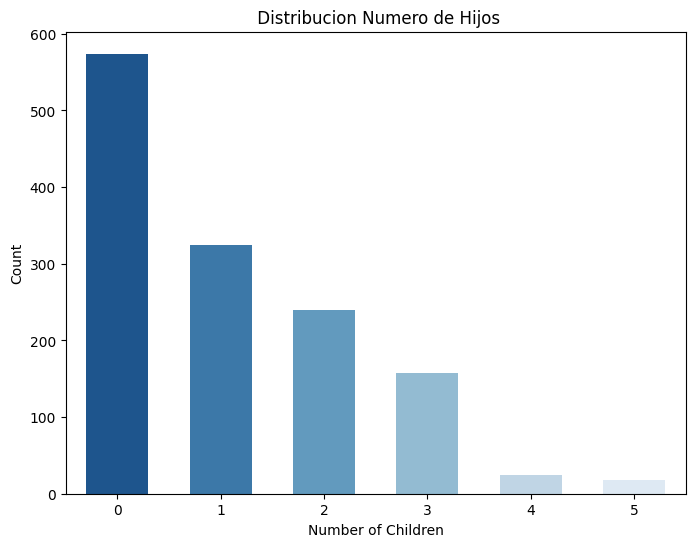

In [4]:
# Crear una lista de colores en tonos de azul, invertida
colors = sns.color_palette('Blues', n_colors=df['Hijos'].nunique())[::-1]

# Crear el gráfico de barras
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Hijos', palette=colors, width=0.6)  # Ajustar el ancho de las barras

# Etiquetas y título
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title(' Distribucion Numero de Hijos')
plt.show()

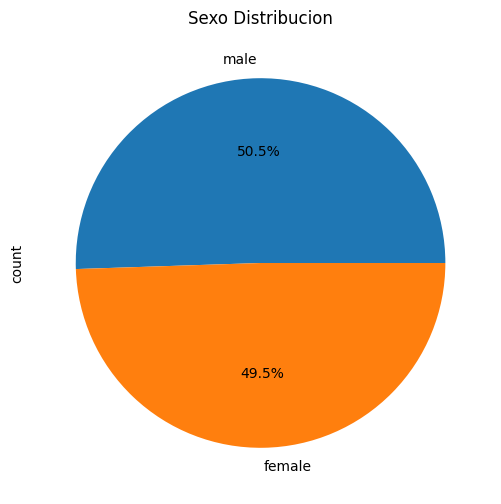

In [34]:
#Gráfico Circular para observar como se distribuyen los fumadores
plt.figure(figsize=(8,6))
df['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sexo Distribucion')
plt.show()

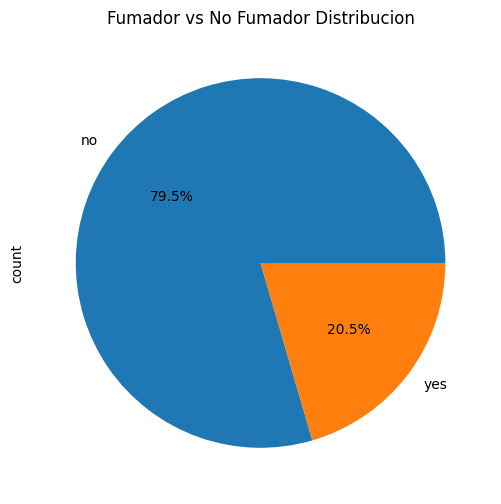

In [8]:
#Gráfico Circular para observar como se distribuyen los fumadores
plt.figure(figsize=(8,6))
df['Fumador'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Fumador vs No Fumador Distribucion')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18232\2355308223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Region EEUU', palette='bright', width=0.4)  # Ajustar el ancho de las barras


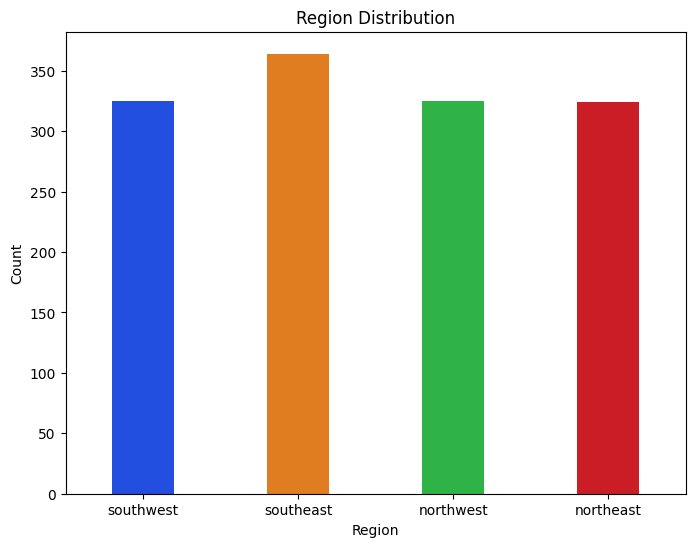

In [9]:
# Crear una paleta de colores profesionales
colors = sns.color_palette('Set2', n_colors=df['Region EEUU'].nunique())

# Crear el gráfico de barras
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Region EEUU', palette='bright', width=0.4)  # Ajustar el ancho de las barras

# Etiquetas y título
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

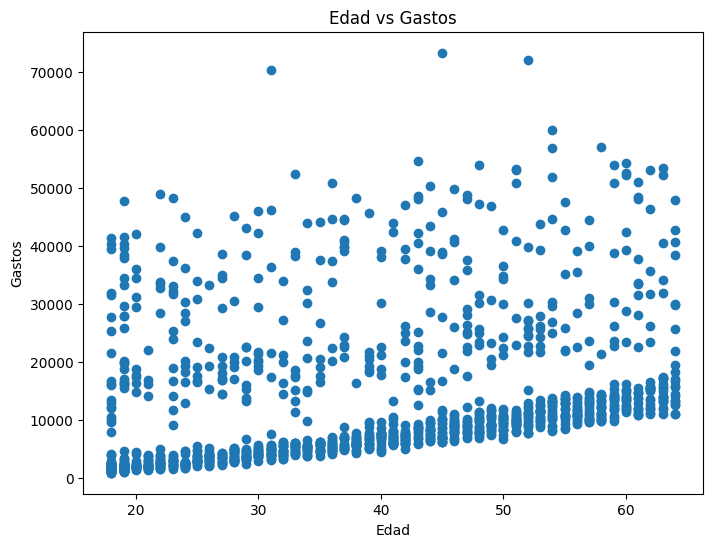

In [11]:
#Análisis Bivariado
#Grafico de dispersion para Edad vs Gastos

plt.figure(figsize=(8,6))
plt.scatter(df['Edad'], df['Gastos'])
plt.xlabel('Edad')
plt.ylabel('Gastos')
plt.title('Edad vs Gastos')
plt.show()

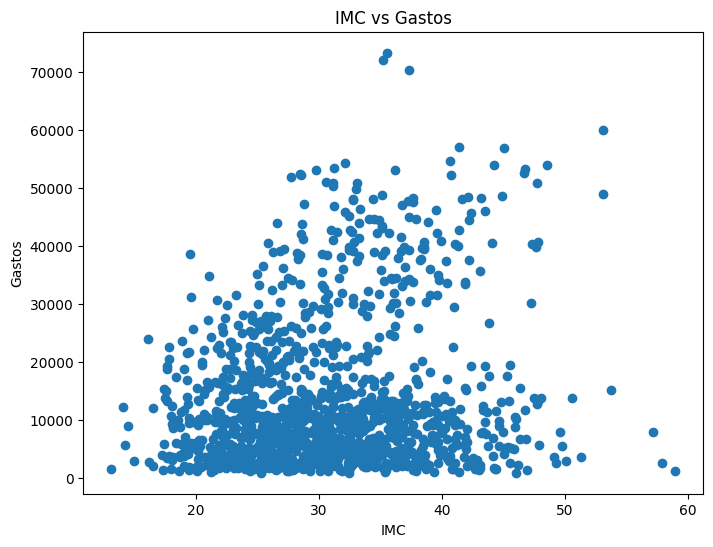

In [12]:
#Gráfico de dispersión para IMC vs Gastos

plt.figure(figsize=(8,6))
plt.scatter(df['IMC'], df['Gastos'])
plt.xlabel('IMC')
plt.ylabel('Gastos')
plt.title('IMC vs Gastos')
plt.show()

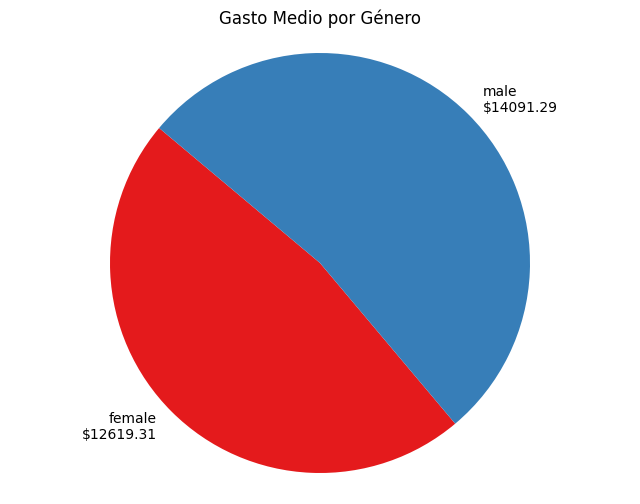

In [14]:
# Calcular el gasto medio por 'Sexo'
gasto_medio_por_genero = df.groupby('Sexo')['Gastos'].mean()

# Crear las etiquetas para el gráfico de tarta con los valores de gasto medio
labels = [f'{sexo}\n${gasto_medio:.2f}' for sexo, gasto_medio in gasto_medio_por_genero.items()]

# Crear el gráfico de tarta
plt.figure(figsize=(8,6))
plt.pie(gasto_medio_por_genero, labels=labels, startangle=140, colors=sns.color_palette('Set1', len(gasto_medio_por_genero)))
plt.title('Gasto Medio por Género')
plt.axis('equal')  # Para asegurar que el gráfico es un círculo.
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20304\1726110298.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Fumador', y='Gastos', palette=colors, ci=None)
C:\Users\HP\AppData\Local\Temp\ipykernel_20304\1726110298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Fumador', y='Gastos', palette=colors, ci=None)


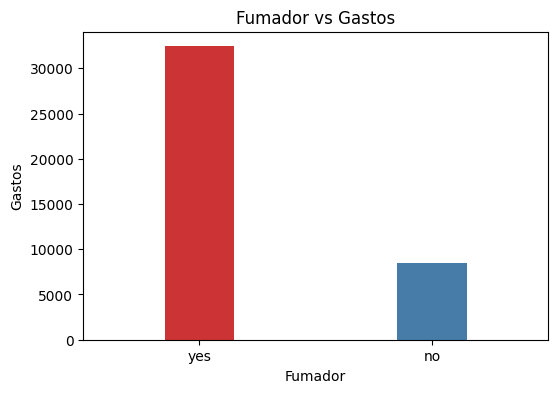

In [52]:
# Crear una paleta de colores profesionales
colors = sns.color_palette('Set1', n_colors=df['Fumador'].nunique())

# Crear el gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Fumador', y='Gastos', palette=colors, ci=None)
plt.xlabel('Fumador')
plt.ylabel('Gastos')
plt.title('Fumador vs Gastos')

# Ajustar el ancho de las barras
for patch in plt.gca().patches:
    current_width = patch.get_width()
    diff = current_width - 0.3
    patch.set_width(0.3)
    patch.set_x(patch.get_x() + diff * .5)

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18232\3781647072.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=gasto_medio_por_region, x='Region EEUU', y='Gastos', color=colors[0], ci=None)


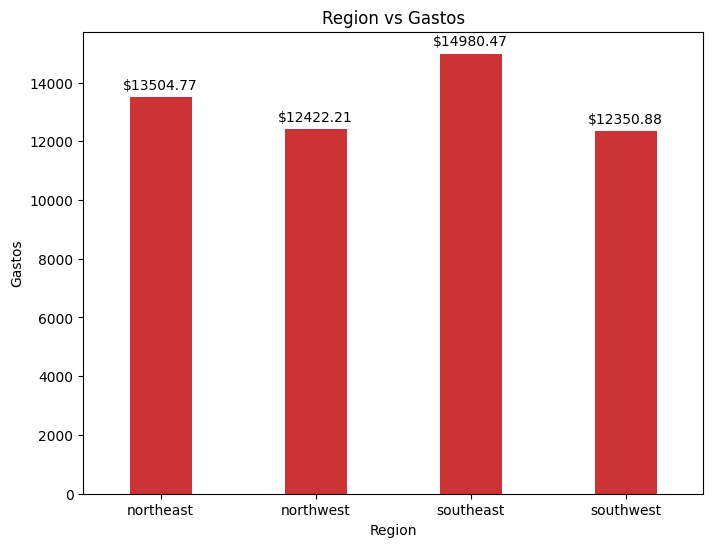

In [16]:
# Crear una paleta de colores profesionales (usando 'Set2' como ejemplo)
colors = sns.color_palette('Set1', n_colors=1)

# Calcular el gasto medio por 'Region EEUU'
gasto_medio_por_region = df.groupby('Region EEUU')['Gastos'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8,6))
ax = sns.barplot(data=gasto_medio_por_region, x='Region EEUU', y='Gastos', color=colors[0], ci=None)

# Ajustar el ancho de las barras
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - 0.4
    patch.set_width(0.4)
    patch.set_x(patch.get_x() + diff * .5)

# Añadir etiquetas de gasto medio encima de las barras
for i, row in gasto_medio_por_region.iterrows():
    ax.text(i, row['Gastos'] + 0.02 * row['Gastos'], f'${row["Gastos"]:.2f}', ha='center')

# Etiquetas y título
plt.xlabel('Region')
plt.ylabel('Gastos')
plt.title('Region vs Gastos')

plt.show()

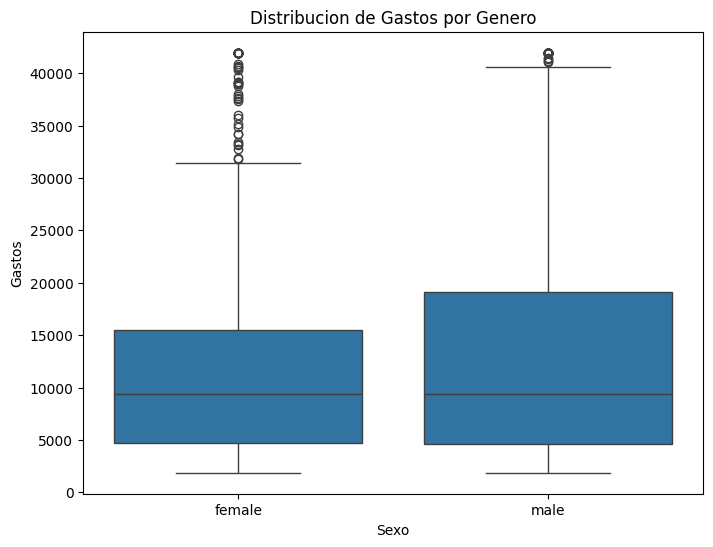

In [53]:
#Grafico de caja para cargos segun el Genero

plt.figure(figsize=(8,6))
sns.boxplot(data=df_winsorized, x='Sexo',y='Gastos')
plt.xlabel('Sexo')
plt.ylabel('Gastos')
plt.title('Distribucion de Gastos por Genero')
plt.show()

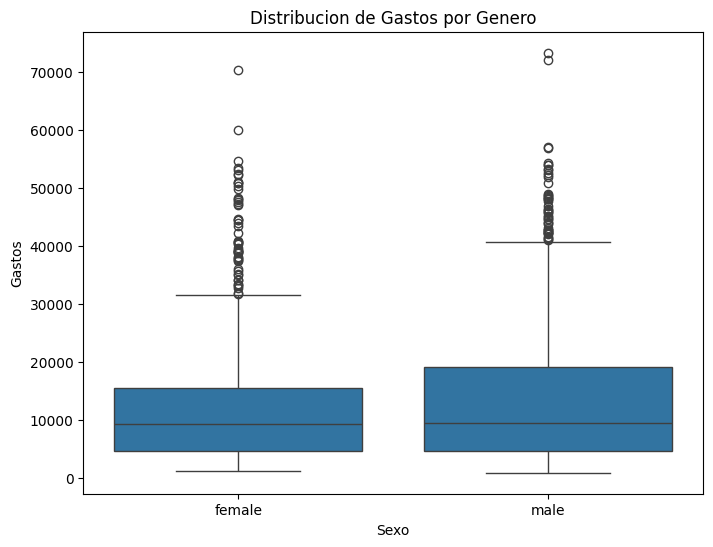

In [16]:
#Grafico de caja para cargos segun el Genero

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Sexo',y='Gastos')
plt.xlabel('Sexo')
plt.ylabel('Gastos')
plt.title('Distribucion de Gastos por Genero')
plt.show()

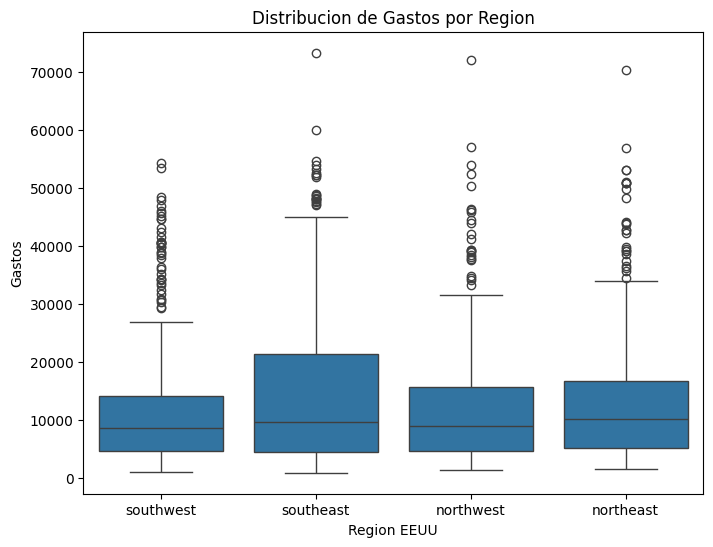

In [18]:
#Grafico de caja para cargos segun Region

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Region EEUU',y='Gastos')
plt.xlabel('Region EEUU')
plt.ylabel('Gastos')
plt.title('Distribucion de Gastos por Region')
plt.show()

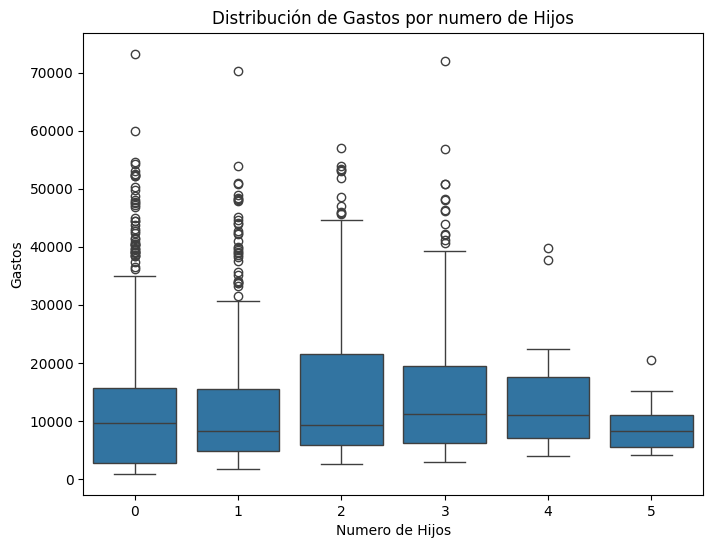

In [22]:
#Grafico de caja para cargos segun numero de hijos

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Hijos', y='Gastos')
plt.xlabel('Numero de Hijos')
plt.ylabel('Gastos')
plt.title('Distribución de Gastos por numero de Hijos')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20304\3225389389.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges_by_age_groups = df.groupby(age_groups)['Gastos'].mean()


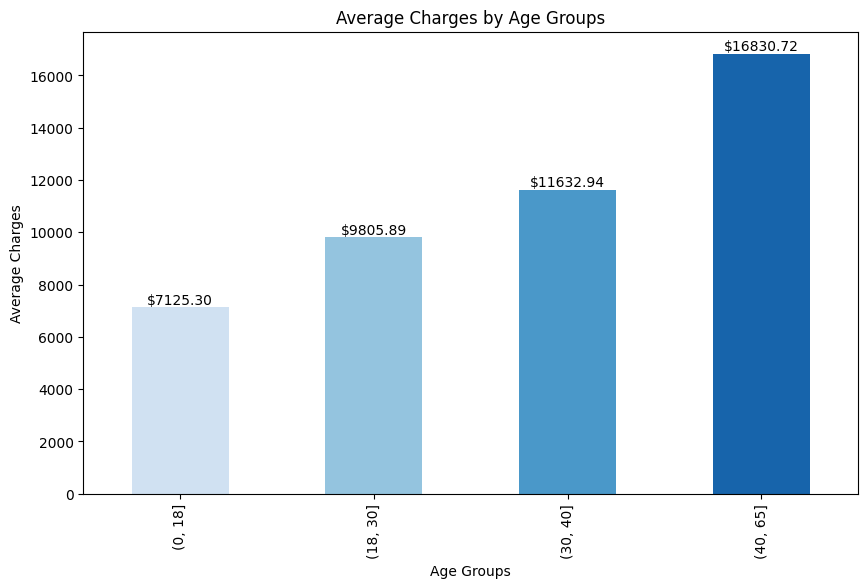

In [56]:
# Crear los grupos de edad
age_groups = pd.cut(df['Edad'], bins=[0, 18, 30, 40, 65])

# Calcular el gasto medio por grupo de edad
avg_charges_by_age_groups = df.groupby(age_groups)['Gastos'].mean()

# Crear el gráfico de barras vertical
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Blues', n_colors=len(avg_charges_by_age_groups))

bar_plot = avg_charges_by_age_groups.plot(kind='bar', color=colors, width=0.5)

# Añadir los valores medios encima de las barras
for i, mean_value in enumerate(avg_charges_by_age_groups):
    bar_plot.text(i, mean_value + 10, f'${mean_value:.2f}', ha='center', va='bottom', color='black')

# Etiquetas y título
plt.xlabel('Age Groups')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Groups')

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20304\3004176979.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges_by_bmi_ranges = df.groupby(bmi_ranges)['Gastos'].mean()


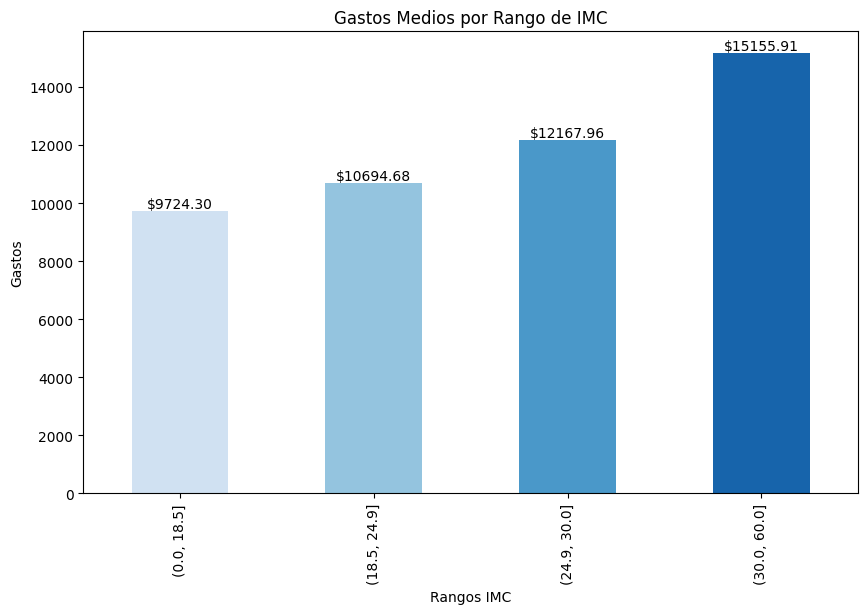

In [57]:
# Crear los rangos de IMC
bmi_ranges = pd.cut(df['IMC'], bins=[0, 18.5, 24.9, 30, 60])

# Calcular el gasto medio por rango de IMC
avg_charges_by_bmi_ranges = df.groupby(bmi_ranges)['Gastos'].mean()

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Blues', n_colors=len(avg_charges_by_bmi_ranges))

bar_plot = avg_charges_by_bmi_ranges.plot(kind='bar', color=colors, width=0.5)

# Añadir los valores medios encima de las barras
for i, mean_value in enumerate(avg_charges_by_bmi_ranges):
    bar_plot.text(i, mean_value + 10, f'${mean_value:.2f}', ha='center', va='bottom', color='black')

# Etiquetas y título
plt.xlabel('Rangos IMC')
plt.ylabel('Gastos')
plt.title('Gastos Medios por Rango de IMC')

plt.show()

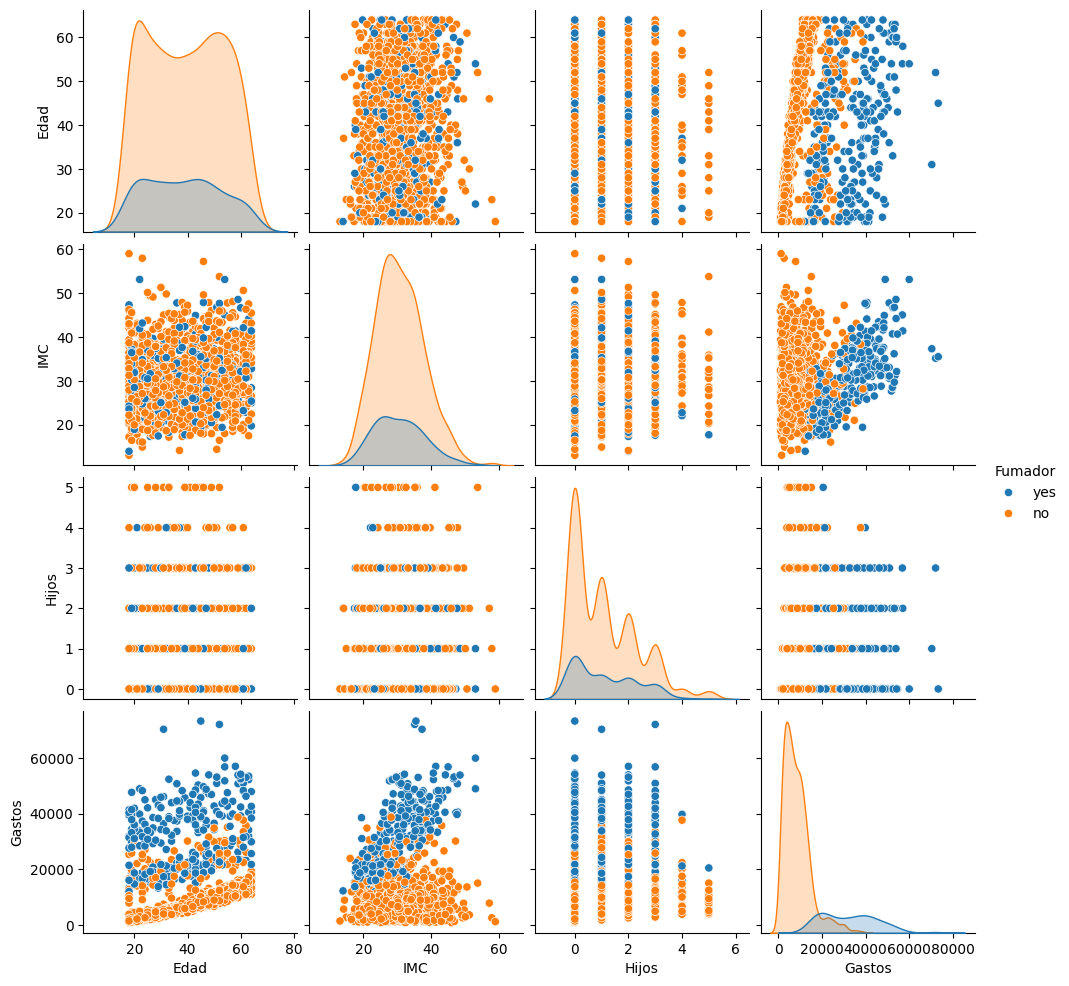

In [25]:
#Grafico de pares

sns.pairplot(df, hue='Fumador')
plt.show()

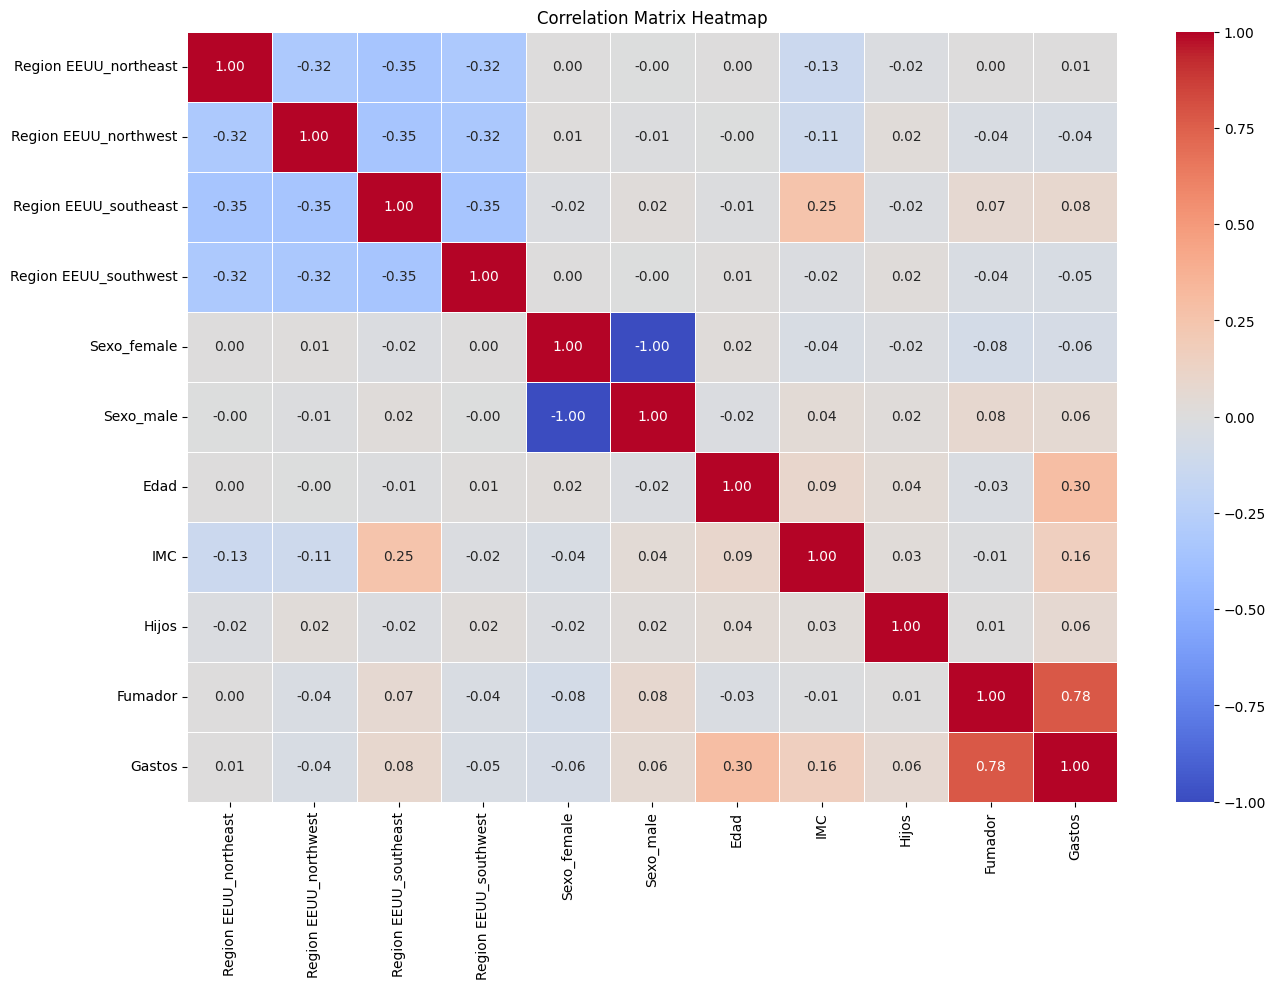

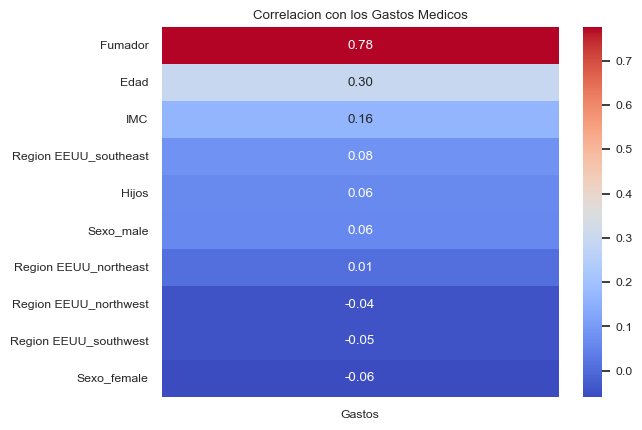

In [27]:
#Matriz de correlacion
#Ajustamos las columnas
data = df.copy()
data['Fumador'] = data['Fumador'].map({'yes': 1, 'no': 0})
categorical_columns = ['Region EEUU','Sexo']
numerical_columns = ['Edad','IMC','Hijos','Fumador','Gastos']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)
#Escalado de Datos
scaler = StandardScaler()

#Realizamos el escalamiento de las variables numericas
scaled_numerical = scaler.fit_transform(data[numerical_columns])

#Convertimos a las variables numericas escaladas
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

#Eliminamos las variables numericas origniales
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

#Concatenamos las variables dummies y las variables numericas escaladas
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
correlation_matrix = processed_df.corr()

#Grafico 1

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['Gastos'].drop('Gastos')

#Ordenamos los valores de la correlacion
target_corr_sorted = target_corr.sort_values(ascending=False)

#Grafico 2

#Creamos un mapa de calor con las correlaciones y la variable objetivo

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlacion con los Gastos Medicos")
plt.show()

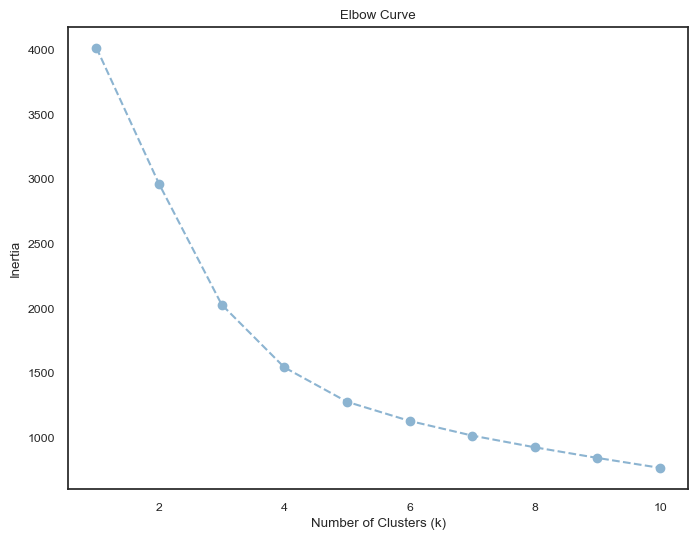

              Edad        IMC        Gastos
cluster                                    
0        27.222962  28.986106   6371.195424
1        40.564706  35.422824  40572.159412
2        51.502646  31.224427  12616.112540


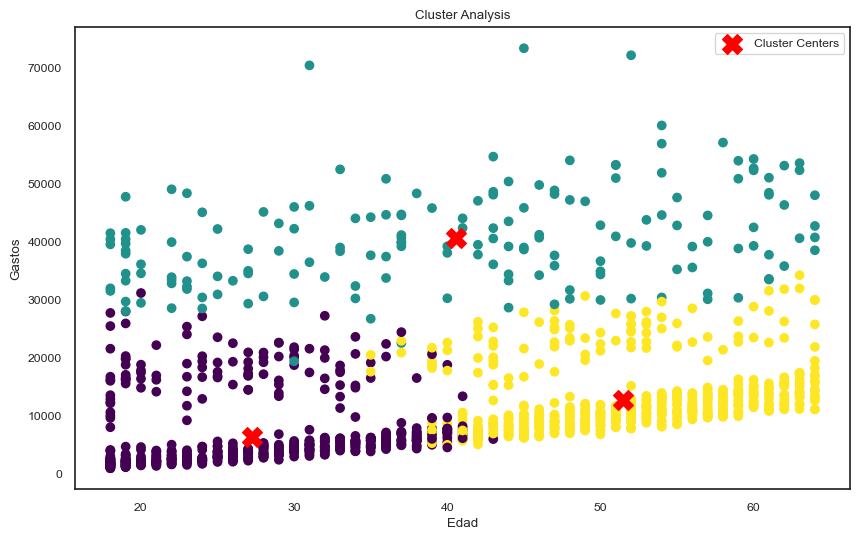

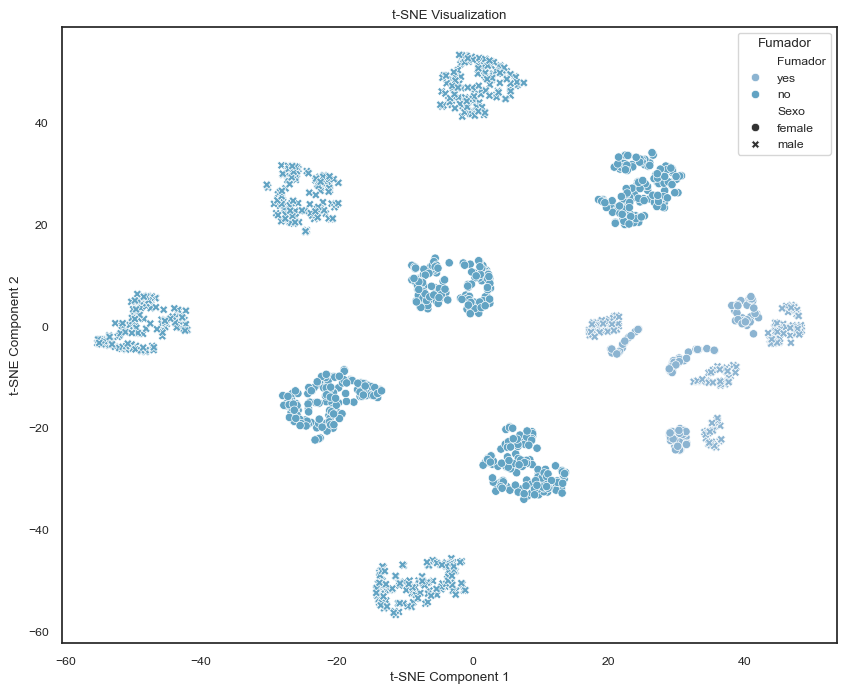

In [28]:
#Análisis Clustering
#Seleccionamos las variables para el clustering

features = ['Edad', 'IMC', 'Gastos']
categorical_features = ['Sexo','Fumador']

#Convertimos las variables categoricas a numericas utilizando one-hot encoding

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df_encoded[features]

#Escalamos las variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Determinamos el numero optimo de clusters utilizando el metodo elbow

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos el Elbow 

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#Elegimos el optimo numero de cluster basandonos en la curva de elbow

k=3

#Realizamos el clusterizado con k-means

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

#Agregamos la variable "cluster" al conjunto de datos

df['cluster'] = labels

#Analizamos el cluster
cluster_analysis = df.groupby('cluster')[features].mean()
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Edad'], df['Gastos'], c=df['cluster'], cmap='viridis')
plt.scatter(cluster_analysis['Edad'], cluster_analysis['Gastos'], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Edad')
plt.ylabel('Gastos')
plt.title('Cluster Analysis')
plt.legend()
plt.show()

#Calidad del clustering
#Seleccionamos las variables para el grafico t-SNE
numerical_features = ['Edad', 'IMC', 'Gastos']
categorical_features = ['Sexo', 'Fumador', 'Region EEUU']

# Realizamos el encoding para las variables categoricas
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Realizamos escalamiento para las variables
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded[numerical_features + list(df_encoded.columns[df_encoded.columns.str.startswith(tuple(categorical_features))])])

# Realizamos el t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Creamos el grafico
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Fumador'], style=df['Sexo'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.legend(title='Fumador', loc='upper right')
plt.show()

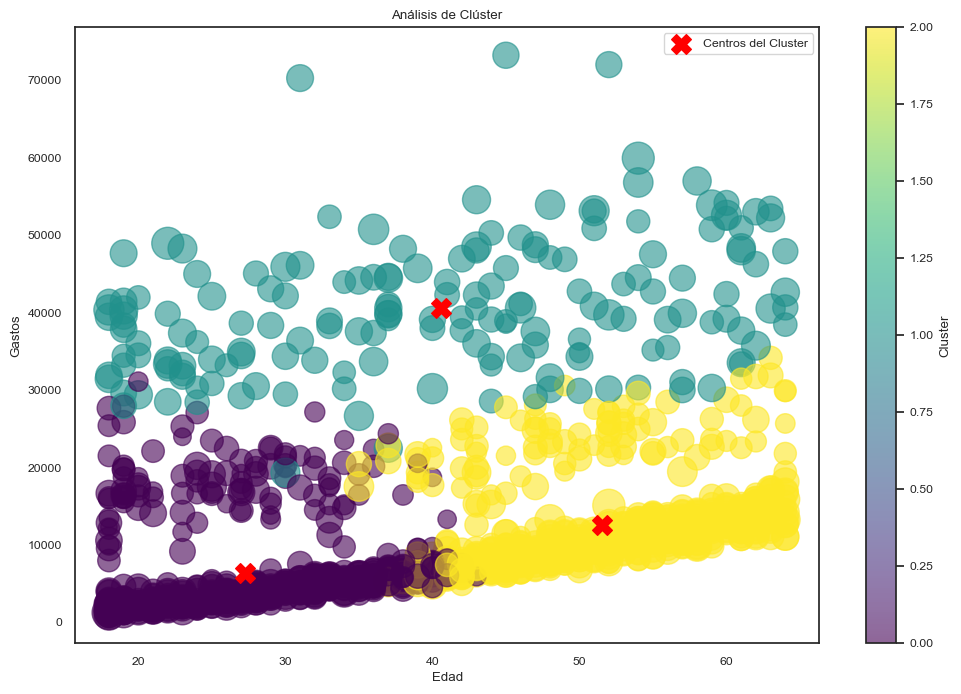

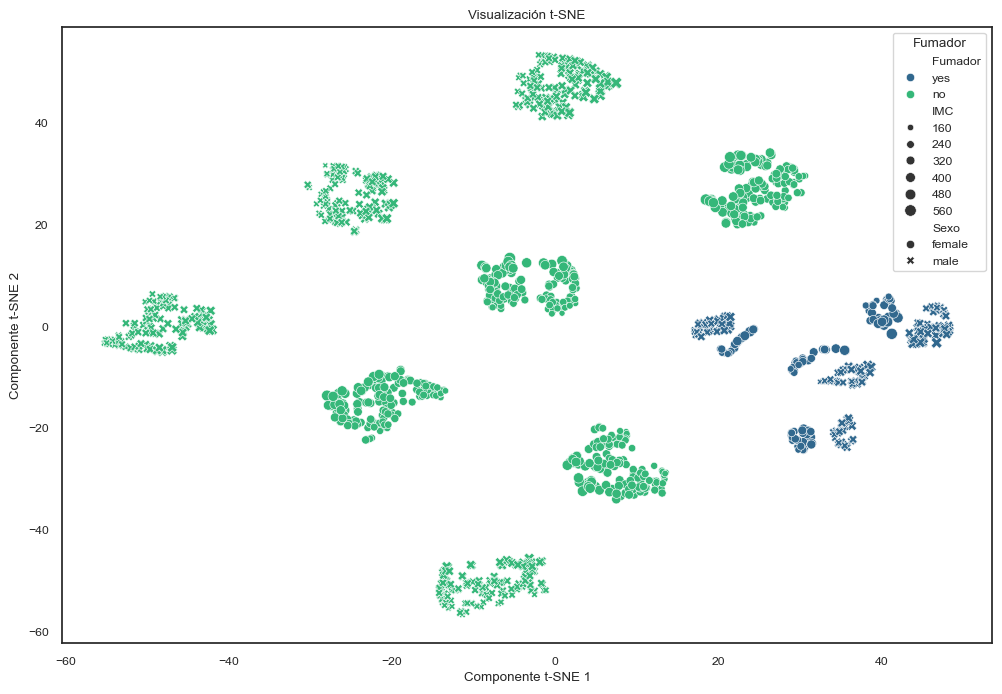

In [30]:
# Visualize the clusters with improved visualization of features
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Edad'], df['Gastos'], c=df['cluster'], cmap='viridis', s=df['IMC']*10, alpha=0.6)
plt.scatter(cluster_analysis['Edad'], cluster_analysis['Gastos'], c='red', marker='X', s=200, label='Centros del Cluster')
plt.xlabel('Edad')
plt.ylabel('Gastos')
plt.title('Análisis de Clúster')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()

# Visualización mejorada del t-SNE
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Fumador'], style=df['Sexo'], size=df['IMC']*10, palette='viridis')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Visualización t-SNE')
plt.legend(title='Fumador', loc='upper right')
plt.show()


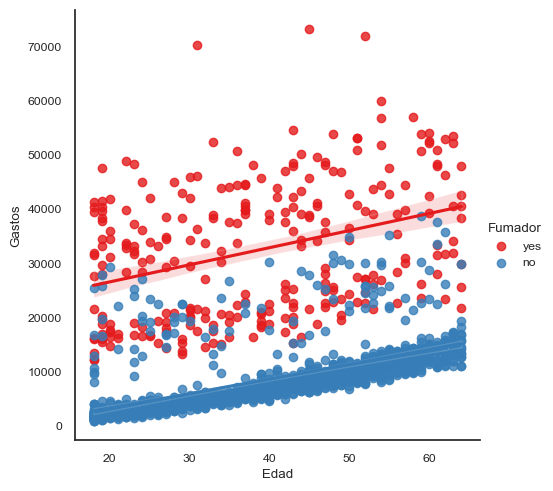

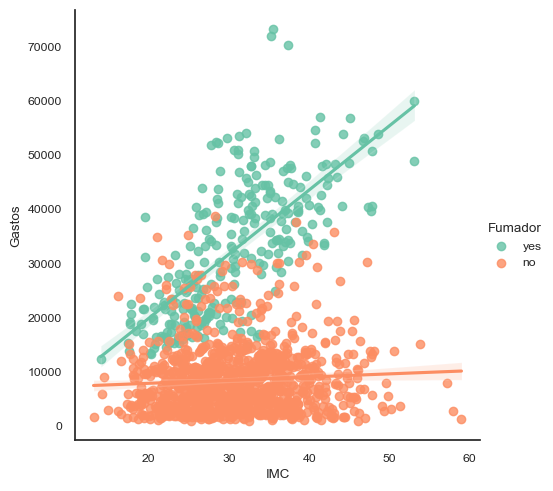

In [29]:
#Analizamos gráficos sobre los gastos en edad, IMC
ax = sns.lmplot(x = 'Edad', y = 'Gastos', data=df, hue='Fumador', palette='Set1')
ax = sns.lmplot(x = 'IMC', y = 'Gastos', data=df, hue='Fumador', palette='Set2')